In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/full_data.csv', parse_dates=['date'])
data.head()

,id,station,date,n100,latitude,longitude,aermr01,aermr02,aermr03,aermr04,...,t2m,blh,co,c5h8,no2,no,so2,nh3,crwc,c10h16
0,ABZ-2012-01-26,ABZ,2012-01-26,2708.085714,50.57,12.99,6.752697e-12,5.765684e-10,3.351248e-11,2.513737e-15,...,268.37625,306.51462,3.418626e-07,1.845452e-11,2.060121e-08,1.302913e-08,6.464830e-09,8.448101e-10,0.0,2.113917e-10
1,ABZ-2012-01-27,ABZ,2012-01-27,2489.175000,50.57,12.99,4.223335e-12,3.600730e-10,1.855095e-11,2.457708e-12,...,267.83536,142.03300,3.787211e-07,2.230681e-11,2.199851e-08,1.489063e-08,7.113044e-09,1.008734e-09,0.0,2.499145e-10
2,ABZ-2012-01-28,ABZ,2012-01-28,3484.229167,50.57,12.99,3.553853e-12,3.007895e-10,2.072250e-10,2.348849e-11,...,269.69257,152.80160,5.185500e-07,3.481757e-11,1.887175e-08,3.310498e-08,7.495814e-09,1.407371e-09,0.0,4.513248e-10
3,ABZ-2012-01-29,ABZ,2012-01-29,2977.512500,50.57,12.99,8.665312e-12,7.307493e-10,5.219741e-11,1.661040e-10,...,269.08804,461.47455,3.129840e-07,1.296726e-11,1.569601e-08,4.424891e-09,4.929475e-09,1.466395e-09,0.0,1.150862e-10
4,ABZ-2012-01-30,ABZ,2012-01-30,2702.463636,50.57,12.99,1.436837e-11,1.208825e-09,5.724685e-11,1.925855e-10,...,267.95770,610.29910,2.414889e-07,8.755192e-12,1.345031e-08,1.021235e-09,5.219232e-09,1.477080e-09,0.0,4.446712e-11


In [3]:
X, y = data.iloc[:,4:], data.n100

In [4]:
def xgboost(name, X, y, params):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    regressor = xgb.XGBRegressor()
    # regressor = GridSearchCV(estimator=regressor, param_grid=params)
    regressor.fit(X_train, y_train)
    # print(regressor.cv_results_)
    
    y_pred = regressor.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print('RMSE:', rmse)
    print('R2:', r2)
    
    plt.rcParams['figure.figsize'] = [100, 20]
    xgb.plot_tree(regressor, num_trees=0)
    plt.savefig(f'plots/xgboost/{name}_tree.pdf')
    
    plt.rcParams['figure.figsize'] = [5, 10]
    xgb.plot_importance(regressor)
    plt.savefig(f'plots/xgboost/{name}_features.pdf')

In [5]:
# params = {'n_estimators': [10, 50, 100], 'reg_lambda': [1, 2, 3], 'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [3, 5, 7]}
params = {'n_estimators': 100, 'reg_lambda': 1, 'learning_rate': 0.1, 'max_depth': 3}

RMSE: 918.7586188050687
R2: 0.6595120709109065


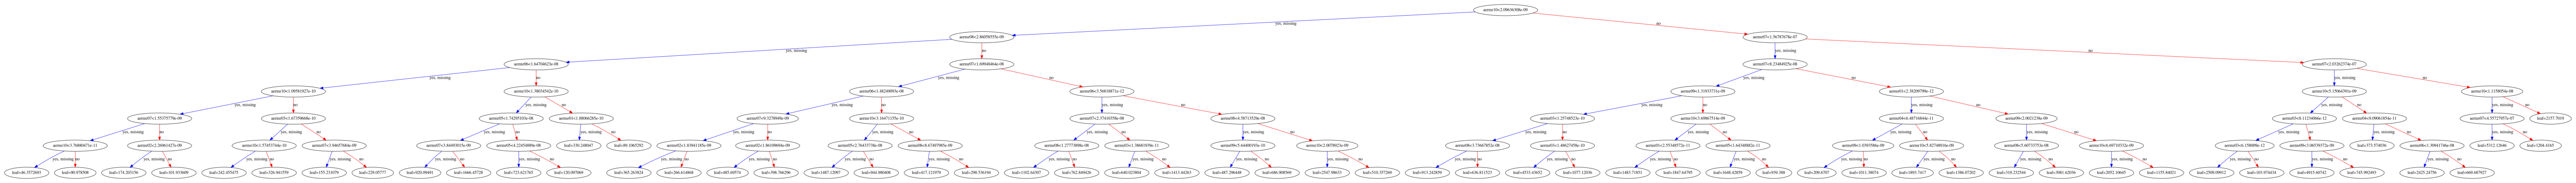

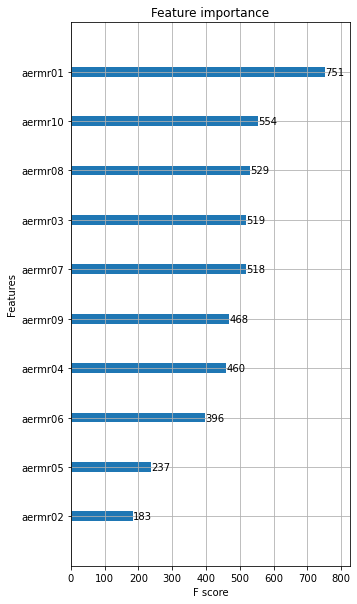

In [6]:
aerosols = [var for var in X.columns if var[:5] == 'aermr']
xgboost('aerosols', X[aerosols], y, params)

RMSE: 654.518345339089
R2: 0.8146253927973832


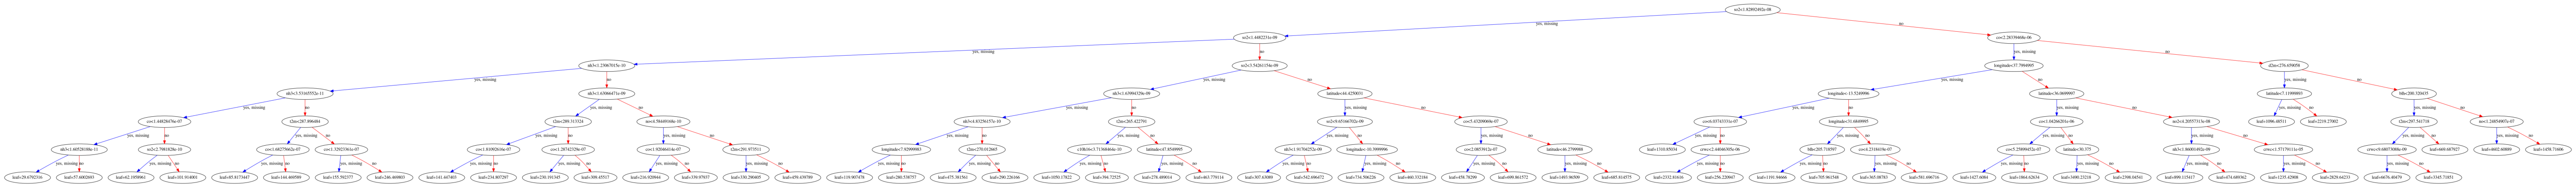

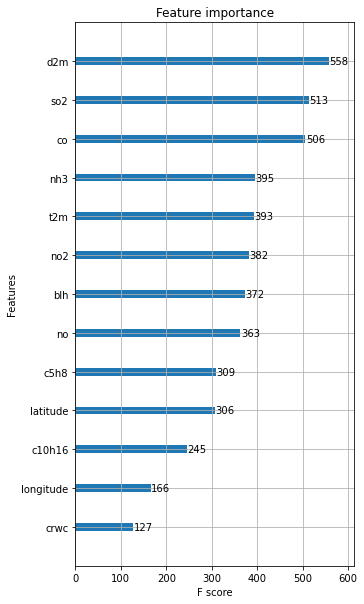

In [7]:
atmospheric = [var for var in X.columns if var[:5] != 'aermr']
xgboost('atmospheric', X[atmospheric], y, params)

RMSE: 821.239106060754
R2: 0.73305241789656


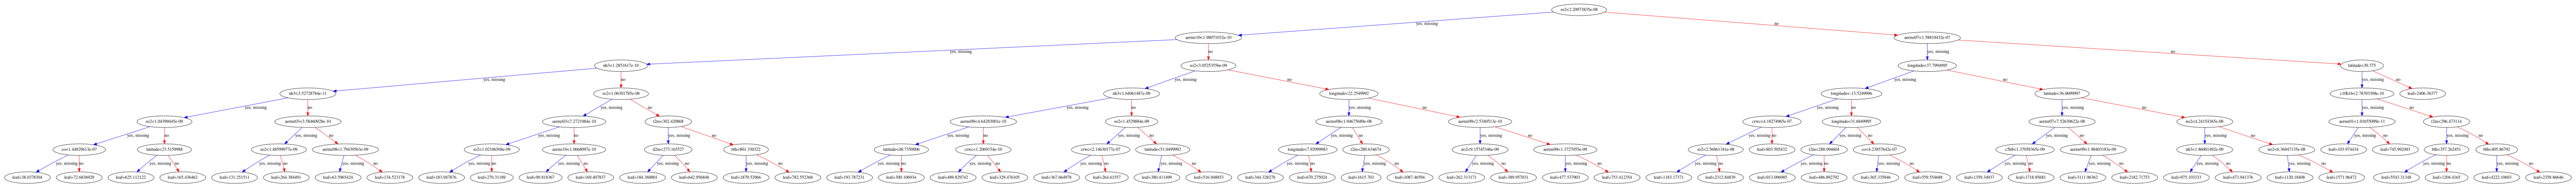

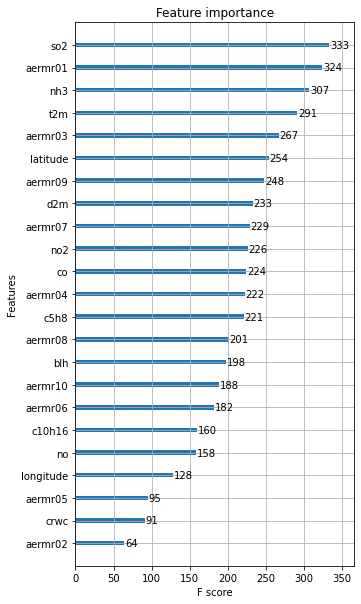

In [8]:
xgboost('complete', X, y, params)